## CSCN8010-24S-Sec1-Foundations of Machine Learning


### LAB 3 Activity - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset


### Prasant Pradeep (8893984)

### Step 1: Framing the Problem and Looking at the Big Picture

- #### Objective: Predict disease progression based on BMI using linear regression.
- #### Problem Type: Supervised learning (regression).
- #### Performance Measure: Mean Squared Error (MSE) and R² score.

### Step 2 : Getting the Data

In [46]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes.data, diabetes.target

### Step 3: Explore the data

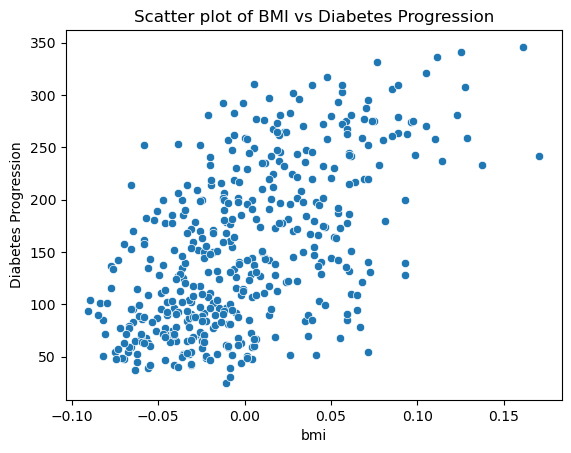

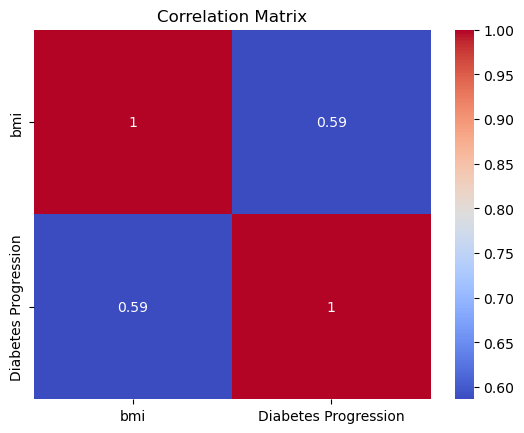

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the diabetes dataset, selecting only BMI for simplicity
diabetes_df = pd.DataFrame(data=diabetes_X, columns=diabetes.feature_names)
diabetes_df = diabetes_df[['bmi']]
diabetes_df['Diabetes Progression'] = diabetes_y

# Visualize the relationship between BMI and diabetes progression
sns.scatterplot(data=diabetes_df, x='bmi', y='Diabetes Progression')
plt.title("Scatter plot of BMI vs Diabetes Progression")
plt.show()

# Study the correlations between attributes
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Step 4: Prepare the data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select only the BMI feature
diabetes_X_bmi = diabetes_df[['bmi']].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_bmi, diabetes_y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 5: Explore many different models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a univariate linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Test Data:", mse_test)

Mean Squared Error on Training Data: 3854.11265207582
Mean Squared Error on Test Data: 4061.8259284949263


### Step 6: Fine-tune Your Models 

#### As we're dealing with a simple linear regression model, there's no fine-tuning necessary.

### Step 7: Present your solution.

Model's Parameters:
Intercept (theta_0): 153.73654390934846
Slope (theta_1): 47.14112176124784


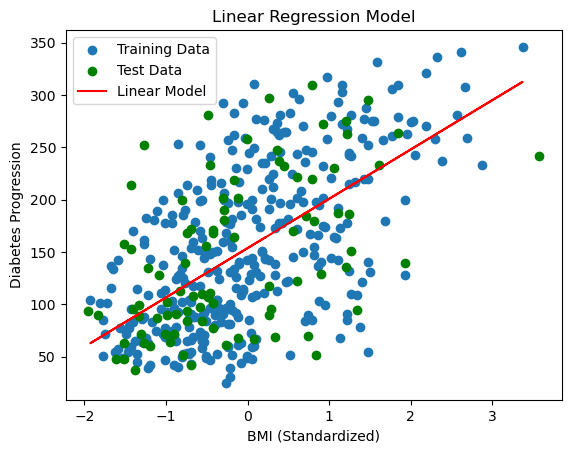

In [50]:
# Model's parameters
print("Model's Parameters:")
print("Intercept (theta_0):", lin_reg.intercept_)
print("Slope (theta_1):", lin_reg.coef_[0])

# Visualize the model
plt.scatter(X_train_scaled, y_train, label='Training Data')
plt.scatter(X_test_scaled, y_test, label='Test Data', color='green')
plt.plot(X_train_scaled, y_train_pred, color='red', label='Linear Model')
plt.xlabel('BMI (Standardized)')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

## Insights and Outcomes

### Model Parameters:
- **Intercept (θ0)**: The intercept of the regression model is approximately 153.74.
- **Slope (θ1)**: The slope of the regression model is approximately 47.14.

### Model Performance:
- **Mean Squared Error (MSE) on Training Data**: 3854.11
- **Mean Squared Error (MSE) on Test Data**: 4061.83

### Visual Analysis:
- The scatter plot of BMI vs. diabetes progression shows a positive correlation, as indicated by the upward trend in the red line (linear model) fitting the data points.
- The training and test data points are closely clustered around the linear regression line, which suggests that BMI is a reasonably good predictor of diabetes progression.

### Takeaways
1. **BMI as a Predictor**: The positive slope (47.14) indicates a significant relationship between BMI and diabetes progression. Specifically, higher BMI values are associated with increased progression of diabetes one year after baseline. This means that individuals with higher BMI tend to experience more severe diabetes progression over time.
2. **Model Fit**: The linear regression model shows a decent fit to the data. However, the MSE values suggest there is still unexplained variability in diabetes progression. This implies that while BMI is an important factor, other variables are also influencing the progression of diabetes.
3. **Health Implications**: The strong relationship between BMI and diabetes progression highlights the importance of maintaining a healthy weight. This insight can be valuable for healthcare providers in advising patients on weight management as a strategy to control diabetes progression.
4. **Predictive Power**: Despite the usefulness of BMI as a predictor, the relatively high MSE values indicate that relying on BMI alone is insufficient for precise predictions. This suggests that incorporating additional features (like blood pressure, age, or other health metrics) could improve the accuracy of the model.

### Limitations and Next Steps
1. **Univariate Limitation**: This analysis considers only one feature (BMI). Future work should include other relevant features (e.g., blood pressure, age, etc.) to capture a more comprehensive picture of diabetes progression.
2. **Assumptions**: The linear regression model assumes a linear relationship between BMI and diabetes progression. Non-linear relationships or interactions with other variables are not captured by this model.
3. **Model Improvement**: To improve the model, consider exploring polynomial regression, multiple linear regression with additional features, or more complex models such as decision trees or ensemble methods.